# Banknote Authentication Machine Learning Project

In [132]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import validation_curve
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

### 1. Read-in Data

In [3]:
headers = ["variance", "skewness", "curtosis","entropy","class"]
data = pd.read_csv('data_banknote_authentication.txt', names=headers)
data.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


### 2. Exploratory Data Analysis

In [4]:
print("There are",len(data[data['class']==0]),"observations classified as 0, and",len(data[data['class']==1]),"observations classified as 1")

There are 762 observations classified as 0, and 610 observations classified as 1


#### - Boxplots for each predictors vs response variable

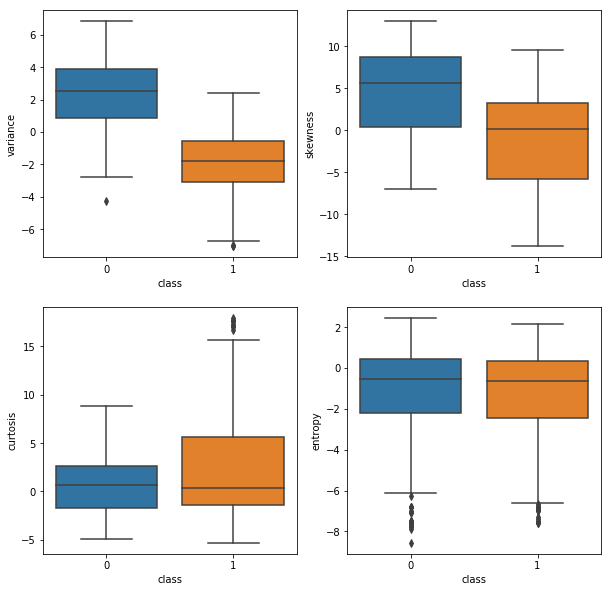

In [5]:
fig, axes = plt.subplots(ncols=2, nrows=2,figsize=(10, 10))

for i, ax in zip(range(4), axes.flat):
    sns.boxplot(x="class", y=headers[i],data=data, ax=ax)
plt.show()

### - It is very obvious that 'variance' predictor will be very effective to classify whether the banknote is authentic or not by itself. Including this predictor will result the model accuracy of 100% for most of the models. For practicing the machine learning method, I decided to remove 'variance' to make use of various methods.

In [6]:
newdata = data.iloc[:,1:5]
newdata.head()

,skewness,curtosis,entropy,class
0,8.6661,-2.8073,-0.44699,0
1,8.1674,-2.4586,-1.46210,0
2,-2.6383,1.9242,0.10645,0
3,9.5228,-4.0112,-3.59440,0
4,-4.4552,4.5718,-0.98880,0


### 3. Analysis

#### - split the dataset to training and testing with 1:4 Ratio

In [77]:
train, test = train_test_split(newdata, test_size=0.25)

Xtrain = train.drop(['class'],axis=1)
Ytrain = train['class']
Xtest = test.drop(['class'],axis=1)
Ytest = test['class']

#### - define functions for model accuracy

In [30]:
def sensitivity(x):
    sensitivity= x[0][0] / (x[0][0] + x[0][1])
    return sensitivity
def specificity(x):
    specificity= x[1][1] / (x[1][0] + x[1][1])
    return specificity
def accuracy(x):
    accuracy= (x[0][0] + x[1][1]) / sum(sum(x))
    return accuracy

In [31]:
def cvvalscore(model):
    scores = cross_val_score(estimator=model, 
                         X=Xtrain, 
                         y=Ytrain.ravel(), #ravel changes the column to array (it doesn't alter the result but gets rid of warning message)
                         cv=10, # k-fold
                         n_jobs=1) #number of CPU. -1 means all CPU's
    print('10-fold CV accuracy scores: %s' % scores)
    print('10-fold CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

In [32]:
def scores(model, pred):
    result = confusion_matrix(Ytest,pred)
    print(result, "Confusion Matrix")
    print("Accuracy: %.3f, Sensitivity: %.3f, and Specificity: %.3f" % (accuracy(result),sensitivity(result),specificity(result)))
    print(classification_report(Ytest, pred))
    return cvvalscore(model) # 10-fold Cross validation

### K-Nearestarest Neighbor with optimal K

Text(0, 0.5, 'Mean Error')

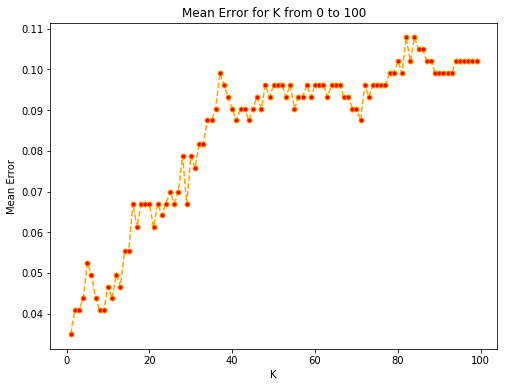

In [78]:
lists = []
for i in range(1, 100):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(Xtrain, Ytrain.ravel())
    pred = knn.predict(Xtest)
    lists.append(np.mean(pred != np.array(Ytest))) # store the error in the empty list
plt.figure(figsize=(8, 6))
plt.plot(range(1, 100), lists, color='orange', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=5)
plt.title('Mean Error for K from 0 to 100')
plt.xlabel('K')
plt.ylabel('Mean Error')

In [79]:
KNN = KNeighborsClassifier(n_neighbors=10) # KNN with k=35 which has the lowest error according to the plot above
KNN.fit(Xtrain, Ytrain.ravel()) # fit the model
knnpred = KNN.predict(Xtest) # predict with the testing data
scores(KNN,knnpred)

[[188  12]
 [  4 139]] Confusion Matrix
Accuracy: 0.953, Sensitivity: 0.940, and Specificity: 0.972
              precision    recall  f1-score   support

           0       0.98      0.94      0.96       200
           1       0.92      0.97      0.95       143

   micro avg       0.95      0.95      0.95       343
   macro avg       0.95      0.96      0.95       343
weighted avg       0.95      0.95      0.95       343

10-fold CV accuracy scores: [0.97115385 0.96153846 0.95145631 0.94174757 0.95145631 0.96116505
 0.97087379 0.95098039 0.97058824 0.96078431]
10-fold CV accuracy: 0.959 +/- 0.010


## Discriminant Analysis

### - LDA

In [35]:
lda = LinearDiscriminantAnalysis()
ldafit = lda.fit(Xtrain,Ytrain.ravel())
ldapred = ldafit.predict(Xtest)
ldaresult = confusion_matrix(Ytest,ldapred)
scores(lda,ldapred)

[[155  35]
 [ 28 125]] Confusion Matrix
Accuracy: 0.816, Sensitivity: 0.816, and Specificity: 0.817
              precision    recall  f1-score   support

           0       0.85      0.82      0.83       190
           1       0.78      0.82      0.80       153

   micro avg       0.82      0.82      0.82       343
   macro avg       0.81      0.82      0.81       343
weighted avg       0.82      0.82      0.82       343

10-fold CV accuracy scores: [0.81730769 0.74038462 0.82524272 0.82524272 0.7961165  0.78640777
 0.82524272 0.85294118 0.82352941 0.79411765]
10-fold CV accuracy: 0.809 +/- 0.029


### - QDA

In [36]:
qda = QuadraticDiscriminantAnalysis()
qdafit = qda.fit(Xtrain,Ytrain)
qdapred = qdafit.predict(Xtest)
scores(qda,qdapred)

[[158  32]
 [ 32 121]] Confusion Matrix
Accuracy: 0.813, Sensitivity: 0.832, and Specificity: 0.791
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       190
           1       0.79      0.79      0.79       153

   micro avg       0.81      0.81      0.81       343
   macro avg       0.81      0.81      0.81       343
weighted avg       0.81      0.81      0.81       343

10-fold CV accuracy scores: [0.83653846 0.74038462 0.81553398 0.82524272 0.84466019 0.7961165
 0.77669903 0.88235294 0.8627451  0.76470588]
10-fold CV accuracy: 0.814 +/- 0.043


### Logistics Regression

In [37]:
import statsmodels.api as sm
logit = sm.Logit(Ytrain,Xtrain) #logistics regression
result = logit.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.435487
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  class   No. Observations:                 1029
Model:                          Logit   Df Residuals:                     1026
Method:                           MLE   Df Model:                            2
Date:                Fri, 10 Jan 2020   Pseudo R-squ.:                  0.3660
Time:                        19:11:42   Log-Likelihood:                -448.12
converged:                       True   LL-Null:                       -706.81
                                        LLR p-value:                4.480e-113
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
skewness      -0.5797      0.036    -16.013      0.000      -0.651      -0.509
curtosis      -0.3797      0.

In [38]:
logistics = LogisticRegression(solver='lbfgs') # solver = 'lbfgs' gets rid of warning messages
logistics.fit(Xtrain, Ytrain.ravel())
logpred = logistics.predict(Xtest)
scores(logistics,logpred)

[[157  33]
 [ 29 124]] Confusion Matrix
Accuracy: 0.819, Sensitivity: 0.826, and Specificity: 0.810
              precision    recall  f1-score   support

           0       0.84      0.83      0.84       190
           1       0.79      0.81      0.80       153

   micro avg       0.82      0.82      0.82       343
   macro avg       0.82      0.82      0.82       343
weighted avg       0.82      0.82      0.82       343

10-fold CV accuracy scores: [0.81730769 0.73076923 0.82524272 0.81553398 0.7961165  0.77669903
 0.81553398 0.83333333 0.82352941 0.78431373]
10-fold CV accuracy: 0.802 +/- 0.029


### Ensemble Methods

#### - Decision Tree

In [39]:
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(Xtrain, Ytrain)
treepred = dtree.predict(Xtest)
scores(dtree,treepred)

[[180  10]
 [ 10 143]] Confusion Matrix
Accuracy: 0.942, Sensitivity: 0.947, and Specificity: 0.935
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       190
           1       0.93      0.93      0.93       153

   micro avg       0.94      0.94      0.94       343
   macro avg       0.94      0.94      0.94       343
weighted avg       0.94      0.94      0.94       343

10-fold CV accuracy scores: [0.94230769 0.90384615 0.95145631 0.93203883 0.95145631 0.96116505
 0.9223301  0.93137255 0.92156863 0.91176471]
10-fold CV accuracy: 0.933 +/- 0.018


#### - Bagging

In [40]:
bagging = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    max_samples=100, bootstrap=True, n_jobs=None, random_state=42) # if bootstrap=False, then it's pasting. Also you can include out-of-bag parameter
bagging.fit(Xtrain, Ytrain)
bagpred = bagging.predict(Xtest)
scores(bagging,bagpred)

[[181   9]
 [ 15 138]] Confusion Matrix
Accuracy: 0.930, Sensitivity: 0.953, and Specificity: 0.902
              precision    recall  f1-score   support

           0       0.92      0.95      0.94       190
           1       0.94      0.90      0.92       153

   micro avg       0.93      0.93      0.93       343
   macro avg       0.93      0.93      0.93       343
weighted avg       0.93      0.93      0.93       343

10-fold CV accuracy scores: [0.90384615 0.90384615 0.96116505 0.87378641 0.93203883 0.94174757
 0.91262136 0.88235294 0.94117647 0.93137255]
10-fold CV accuracy: 0.918 +/- 0.026


#### - Random Forest

In [41]:
randomf = RandomForestClassifier(n_estimators=500, # 500 trees
                                 max_leaf_nodes=16, 
                                 n_jobs=-1, # -1 means use all CPU
                                 random_state=42)
randomf.fit(Xtrain, Ytrain)
rfpred = randomf.predict(Xtest)
scores(randomf,rfpred)

[[184   6]
 [ 20 133]] Confusion Matrix
Accuracy: 0.924, Sensitivity: 0.968, and Specificity: 0.869
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       190
           1       0.96      0.87      0.91       153

   micro avg       0.92      0.92      0.92       343
   macro avg       0.93      0.92      0.92       343
weighted avg       0.93      0.92      0.92       343

10-fold CV accuracy scores: [0.89423077 0.88461538 0.94174757 0.87378641 0.90291262 0.94174757
 0.89320388 0.88235294 0.94117647 0.92156863]
10-fold CV accuracy: 0.908 +/- 0.025


#### -- tuning parameter optimization 

In [99]:
parameter_grid = {
    'n_estimators' : [50,100,200,500,1000],
    'max_depth' : [4,8,12,16,20],
    'min_samples_leaf' : [3,5,7,10,13],
    'min_samples_split' : [2,3,5,10,12]
}

In [100]:
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = parameter_grid,cv = 3, n_jobs = -1, verbose = 2) 

In [101]:
grid_search.fit(Xtrain, Ytrain)

Fitting 3 folds for each of 625 candidates, totalling 1875 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 247 tasks      | elapsed:   13.1s
[Parallel(n_jobs=-1)]: Done 450 tasks      | elapsed:   24.9s
[Parallel(n_jobs=-1)]: Done 733 tasks      | elapsed:   42.0s
[Parallel(n_jobs=-1)]: Done 1098 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1543 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1875 out of 1875 | elapsed:  1.9min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [50, 100, 200, 500, 1000], 'max_depth': [4, 8, 12, 16, 20], 'min_samples_leaf': [3, 5, 7, 10, 13], 'min_samples_split': [2, 3, 5, 10, 12]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [102]:
print(grid_search.best_params_)
print("Best Score:",grid_search.best_score_)

{'max_depth': 12, 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 200}
Best Score: 0.9426627793974732


In [74]:
randomf2 = RandomForestClassifier(n_estimators=500, # 500 trees
                                 max_depth=20,
                                 min_samples_leaf=3,
                                 min_samples_split=2,
                                 n_jobs=-1, # -1 means use all CPU
                                 random_state=42)
randomf2.fit(Xtrain, Ytrain)
rfpred2 = randomf.predict(Xtest)
scores(randomf2,rfpred2)

[[186   8]
 [ 14 135]] Confusion Matrix
Accuracy: 0.936, Sensitivity: 0.959, and Specificity: 0.906
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       194
           1       0.94      0.91      0.92       149

   micro avg       0.94      0.94      0.94       343
   macro avg       0.94      0.93      0.93       343
weighted avg       0.94      0.94      0.94       343

10-fold CV accuracy scores: [0.95192308 0.93203883 0.90291262 0.97087379 0.96116505 0.96116505
 0.93203883 0.97087379 0.92156863 0.97058824]
10-fold CV accuracy: 0.948 +/- 0.023


#### -- Feature Importance

Feature ranking:
1. Feature 0 (0.525679)
2. Feature 1 (0.301611)
3. Feature 2 (0.172710)


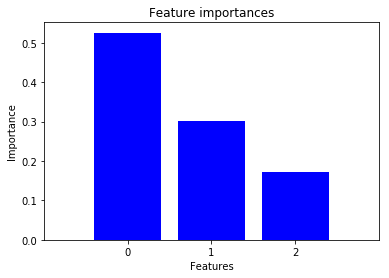

In [48]:
importances = randomf2.feature_importances_

indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for s in range(Xtrain.shape[1]):
    print("%d. Feature %d (%f)" % (s + 1, indices[s], importances[indices[s]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(Xtrain.shape[1]), importances[indices],
       color="blue")
plt.xticks(range(Xtrain.shape[1]), indices)
plt.xlim([-1, Xtrain.shape[1]])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

#### - Boosting

#### --Adaboost (Adaptive Boosting)

In [111]:
parameter_grid = {
    'n_estimators' : [50,100,200,500],
    'algorithm' : ['SAMME', 'SAMME.R'],
}

ada = AdaBoostClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = ada, param_grid = parameter_grid,cv = 3, n_jobs = -1, verbose = 2) 

In [112]:
grid_search.fit(Xtrain, Ytrain)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 out of  24 | elapsed:    0.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:    0.9s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [50, 100, 200, 500], 'algorithm': ['SAMME', 'SAMME.R']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [113]:
print(grid_search.best_params_)
print("Best Score:",grid_search.best_score_)

{'algorithm': 'SAMME.R', 'n_estimators': 200}
Best Score: 0.8940719144800777


In [114]:
adaboost = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), 
    n_estimators=200, 
    algorithm="SAMME.R", 
    learning_rate=0.5)
adaboost.fit(Xtrain, Ytrain.ravel())
adapred = adaboost.predict(Xtest)
scores(adaboost,adapred)

[[188  12]
 [ 17 126]] Confusion Matrix
Accuracy: 0.915, Sensitivity: 0.940, and Specificity: 0.881
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       200
           1       0.91      0.88      0.90       143

   micro avg       0.92      0.92      0.92       343
   macro avg       0.92      0.91      0.91       343
weighted avg       0.92      0.92      0.92       343

10-fold CV accuracy scores: [0.91346154 0.85576923 0.89320388 0.88349515 0.89320388 0.9223301
 0.86407767 0.89215686 0.85294118 0.8627451 ]
10-fold CV accuracy: 0.883 +/- 0.023


#### -- Gradient Boosting 

In [118]:
parameter_grid = {
    'n_estimators' : [50,100,200,500],
    'max_depth' : [6,8,10,12,15],
    'min_samples_split' : [2,4,6,8],
    'learning_rate' : [0.05,0.1,0.2,0.5]
}

gb = GradientBoostingClassifier()
grid_search = GridSearchCV(estimator = gb, param_grid = parameter_grid,cv = 3, n_jobs = -1, verbose = 2) 

In [120]:
grid_search.fit(Xtrain,Ytrain)

Fitting 3 folds for each of 320 candidates, totalling 960 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:   16.3s
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:   23.7s
[Parallel(n_jobs=-1)]: Done 960 out of 960 | elapsed:   28.8s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sampl...      subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [50, 100, 200, 500], 'max_depth': [6, 8, 10, 12, 15], 'min_samples_split': [2, 4, 6, 8], 'learning_rate': [0.05, 0.1, 0.2, 0.5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [121]:
print(grid_search.best_params_)
print("Best Score:",grid_search.best_score_)

{'learning_rate': 0.1, 'max_depth': 8, 'min_samples_split': 2, 'n_estimators': 500}
Best Score: 0.9446064139941691


In [122]:
gbm = GradientBoostingClassifier(n_estimators=500,
                                 learning_rate=0.1, 
                                 max_depth=8, 
                                 min_samples_split=2)
gbm.fit(Xtrain, Ytrain)
gbmpred = gbm.predict(Xtest)
scores(gbm,gbmpred)

[[193   7]
 [  8 135]] Confusion Matrix
Accuracy: 0.956, Sensitivity: 0.965, and Specificity: 0.944
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       200
           1       0.95      0.94      0.95       143

   micro avg       0.96      0.96      0.96       343
   macro avg       0.96      0.95      0.95       343
weighted avg       0.96      0.96      0.96       343

10-fold CV accuracy scores: [0.96153846 0.92307692 0.95145631 0.96116505 0.95145631 0.93203883
 0.95145631 0.92156863 0.93137255 0.97058824]
10-fold CV accuracy: 0.946 +/- 0.016


C:\Users\lyh51\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:    1.3s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001, 1e-05, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

### SVM

In [140]:
clf = svm.SVC(kernel='linear', C=100)
clf.fit(Xtrain, Ytrain)
clfpred = clf.predict(Xtest)
scores(clf,clfpred)

[[161  39]
 [ 19 124]] Confusion Matrix
Accuracy: 0.831, Sensitivity: 0.805, and Specificity: 0.867
              precision    recall  f1-score   support

           0       0.89      0.81      0.85       200
           1       0.76      0.87      0.81       143

   micro avg       0.83      0.83      0.83       343
   macro avg       0.83      0.84      0.83       343
weighted avg       0.84      0.83      0.83       343

10-fold CV accuracy scores: [0.86538462 0.82692308 0.80582524 0.81553398 0.7961165  0.7961165
 0.81553398 0.81372549 0.81372549 0.84313725]
10-fold CV accuracy: 0.819 +/- 0.020


In [145]:
param_grid = {'C': [0.1, 1, 10, 100], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.00001, 10]}
grid_search = GridSearchCV(svm.SVC(), param_grid, verbose=1)
grid_search.fit(Xtrain, Ytrain)

C:\Users\lyh51\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:    1.3s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001, 1e-05, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [146]:
print(grid_search.best_params_)
print("Best Score:",grid_search.best_score_)

{'C': 1, 'gamma': 1}
Best Score: 0.9718172983479106


In [159]:
clf = svm.SVC(kernel='rbf', C=1,gamma=1,probability=True) #radial based kernal / probability = True is enabling predict_proba in making ROC
clf.fit(Xtrain, Ytrain)
clfpred = clf.predict(Xtest)
scores(clf,clfpred)

[[189  11]
 [  1 142]] Confusion Matrix
Accuracy: 0.965, Sensitivity: 0.945, and Specificity: 0.993
              precision    recall  f1-score   support

           0       0.99      0.94      0.97       200
           1       0.93      0.99      0.96       143

   micro avg       0.97      0.97      0.97       343
   macro avg       0.96      0.97      0.96       343
weighted avg       0.97      0.97      0.97       343

10-fold CV accuracy scores: [0.98076923 0.97115385 0.98058252 0.96116505 0.96116505 0.96116505
 0.98058252 0.94117647 0.98039216 0.97058824]
10-fold CV accuracy: 0.969 +/- 0.012


### 4. Model Comparison and conclusion

In [184]:
def plot_roc_curve(fpr, tpr): # you can use this function to draw 1 ROC curve. If you want to draw multiple lines in one plot, do it manually
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

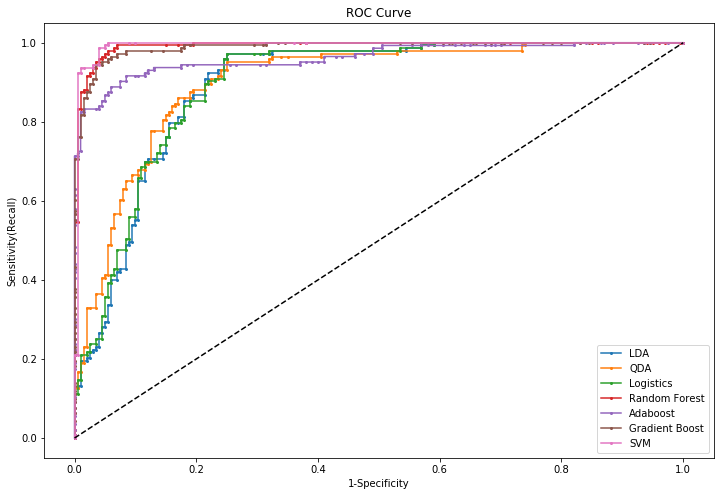

In [161]:
fpr1, tpr1, thresholds1 = roc_curve(Ytest, lda.predict_proba(Xtest)[:, 1]) # you can use decision_function(X) instead of predict_proba
fpr2, tpr2, thresholds1 = roc_curve(Ytest, qda.predict_proba(Xtest)[:, 1])
fpr3, tpr3, thresholds1 = roc_curve(Ytest, logistics.predict_proba(Xtest)[:, 1])
fpr4, tpr4, thresholds1 = roc_curve(Ytest, randomf.predict_proba(Xtest)[:, 1])
fpr5, tpr5, thresholds1 = roc_curve(Ytest, adaboost.predict_proba(Xtest)[:, 1])
fpr6, tpr6, thresholds1 = roc_curve(Ytest, gbm.predict_proba(Xtest)[:, 1])
fpr7, tpr7, thresholds1 = roc_curve(Ytest, clf.predict_proba(Xtest)[:, 1])

plt.figure(figsize=(12,8))
plt.plot(fpr1, tpr1, 'o-', ms=2, label="LDA")
plt.plot(fpr2, tpr2, 'o-', ms=2, label="QDA")
plt.plot(fpr3, tpr3, 'o-', ms=2, label="Logistics")
plt.plot(fpr4, tpr4, 'o-', ms=2, label="Random Forest")
plt.plot(fpr5, tpr5, 'o-', ms=2, label="Adaboost")
plt.plot(fpr6, tpr6, 'o-', ms=2, label="Gradient Boost")
plt.plot(fpr7, tpr7, 'o-', ms=2, label="SVM")
plt.legend()
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity(Recall)')
plt.title('ROC Curve')
plt.show()